In [18]:
import networkx as nx
import matplotlib.pyplot as plt

class doublyLinkedList:
    class Node:
        def __init__(self,data=None):
            self.data=data
            self.next=None
            self.prev=None
    class DLLIterator:
        def __init__(self, node, list):
            self.current = node
            self.list = list

        def __eq__( self, rhs ):
            return self.current == rhs.current

        def __ne__( self, rhs ):
            return self.current != rhs.current

        def getObject( self ):
            return self.current.data

        def __iter__(self): # this is not mandatory, why
            return self

        def __next__( self ):
            if self.current.next != self.list.tail:
                cur_node = self.current
                self.current = self.current.next
                return self
            else:
                raise StopIteration

    class DLLRIterator:
        def __init__(self, node, list):
            self.current = node
            self.list = list

        def __eq__( self, rhs ):
            return self.current == rhs.current

        def __ne__( self, rhs ):
            return self.current != rhs.current

        def getObject( self ):
            return self.current.data

        def __iter__(self): # this is mandatory, why
            return self

        def __next__( self ):
            if self.current.prev != self.list.head:
                cur_node = self.current
                self.current = self.current.prev
                return self
            else:
                raise StopIteration

    def __init__(self):
        self.head = self.Node()
        self.tail = self.Node()
        self.head.next = self.tail
        self.tail.prev = self.head

    def __iter__(self):
        return self.DLLIterator(self.head, self)

    def __reversed__(self):
        return self.DLLRIterator(self.tail, self)

    def begining(self):
        return self.DLLIterator(self.head, self)

    def end(self):
        return self.DLLIterator(self.tail.prev, self)

    def rbegining(self):
        return self.DLLRIterator(self.tail, self)

    def rend(self):
        return self.DLLRIterator(self.head.next, self)

    def append(self, o):
        t = self.Node(o)
        t.next = self.tail
        t.prev = self.tail.prev
        self.tail.prev.next = t
        self.tail.prev = t

    def remove(self, index):
        cur = None
        if type(index) is int:
            cur = self.head.next
            i = 0
            while i != index and cur != self.tail:
                i = i + 1
                cur = cur.next
            if cur == self.tail:
                raise Exception
        elif type(index) is self.DLLIterator:
            cur = index.current
        cur.prev.next = cur.next
        cur.next.prev = cur.prev
        del cur

    def Display(self):
        G = nx.DiGraph()

        current_node = self.head.next
        while current_node != self.tail:
            G.add_node(current_node.data)
            if current_node.next != self.tail:
                G.add_edge(current_node.data, current_node.next.data)
            if current_node.prev != self.head:
                G.add_edge(current_node.data, current_node.prev.data)

            current_node = current_node.next

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', alpha=0.7, arrowsize=20)

        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Doubly Linked List")
        plt.show()



Display 10 items


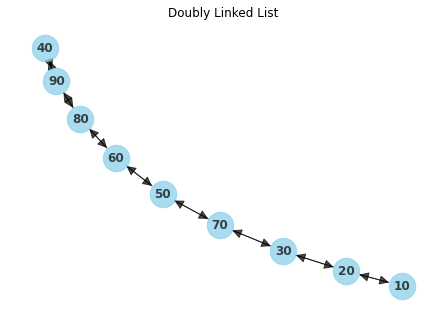

In [19]:
AL = doublyLinkedList()
AL.append(10)
AL.append(20)
AL.append(30)
AL.append(70)
AL.append(50)
AL.append(60)
AL.append(80)
AL.append(90)
AL.append(40)
print("Display 10 items")
AL.Display()


Display without (removed) first two items


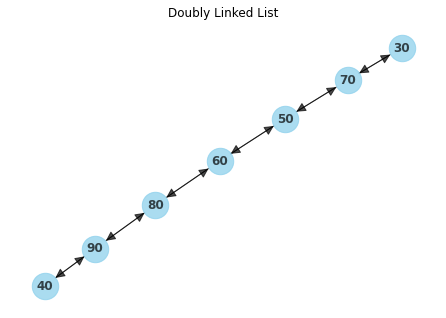

In [20]:
AL.remove(0)
AL.remove(0)
print("Display without (removed) first two items")
AL.Display()

In [21]:
print("OUTPUT of 'for d in AL:'")
for d in AL:
    print(d.getObject())
print()

OUTPUT of 'for d in AL:'
30
70
50
60
80
90
40



In [22]:
print("OUTPUT of 'for d in reversed(AL):'")
for d in reversed(AL):
    print(d.getObject())
print()

OUTPUT of 'for d in reversed(AL):'
40
90
80
60
50
70
30



In [23]:
print("OUTPUT through manual next calls")
itm1 = iter(AL)
itm2 = AL.begining()
print("first through itm1: " + str(next(itm1).getObject()))
print("next through itm1: " + str(next(itm1).getObject()))
print("first through itm2: " + str(next(itm2).getObject()))
print("next through itm2: " + str(next(itm2).getObject()))
print("next through itm2: " + str(next(itm2).getObject()))
print("next through itm1: " + str(next(itm1).getObject()))

OUTPUT through manual next calls
first through itm1: 30
next through itm1: 70
first through itm2: 30
next through itm2: 70
next through itm2: 50
next through itm1: 50


Removing current data
Removed
next through itm2: 60
next through itm2: 80
next through itm2: 90
next through itm1: 60



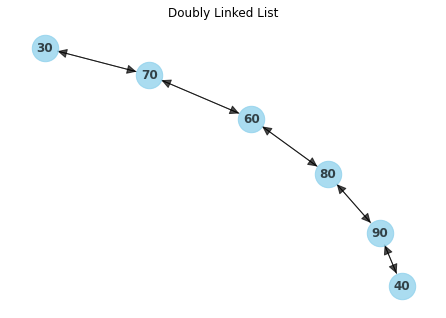

In [24]:
print("Removing current data")
AL.remove(itm1)
print("Removed")
print("next through itm2: " + str(next(itm2).getObject()))
print("next through itm2: " + str(next(itm2).getObject()))
print("next through itm2: " + str(next(itm2).getObject()))
# due to remove above, print("next through itm2: " + str(next(itm2).getObject()))
print("next through itm1: " + str(next(itm1).getObject()))
print()
AL.Display()

OUTPUT through beginning and end
40



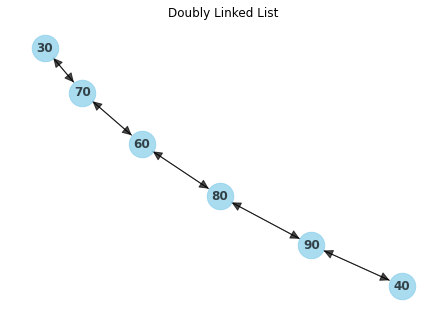

In [25]:
print("OUTPUT through beginning and end")
i = AL.begining()
while i != AL.end():
    i = next(i)
print(i.getObject())
print()
AL.Display()

In [26]:
print("OUTPUT through rbeginning and rend")
i = AL.rbegining()
while i != AL.rend():
    t = next(i)
print(t.getObject())
print()


OUTPUT through rbeginning and rend
30

